In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

In [ ]:
trainpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/train.csv'
testpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/test.csv'
valpath='/content/gdrive/MyDrive/YBIGTA_CreditAI/open/val.csv'
submissionpath= '/content/gdrive/MyDrive/YBIGTA_CreditAI/open/sample_submission.csv'

train=pd.read_csv(trainpath)
test=pd.read_csv(testpath)
val=pd.read_csv(valpath)
submission=pd.read_csv(submissionpath)

In [ ]:
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [ ]:
train.describe()
# scaling 할 것인가?

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,...,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,...,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,...,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,...,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,...,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,...,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,...,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


In [ ]:
train.nunique()

ID     113842
V1     111739
V2     111739
V3     111739
V4     111739
V5     111739
V6     111739
V7     111739
V8     111739
V9     111739
V10    111739
V11    111739
V12    111739
V13    111739
V14    111739
V15    111739
V16    111739
V17    111739
V18    111739
V19    111739
V20    111739
V21    111739
V22    111739
V23    111739
V24    111739
V25    111739
V26    111739
V27    111739
V28    111739
V29     20439
V30     77598
dtype: int64

In [ ]:
val.nunique()

ID       28462
V1       28240
V2       28240
V3       28240
V4       28240
V5       28240
V6       28240
V7       28240
V8       28240
V9       28240
V10      28240
V11      28240
V12      28240
V13      28240
V14      28240
V15      28240
V16      28240
V17      28240
V18      28240
V19      28240
V20      28240
V21      28240
V22      28240
V23      28240
V24      28240
V25      28240
V26      28240
V27      28240
V28      28240
V29       8795
V30      25706
Class        2
dtype: int64

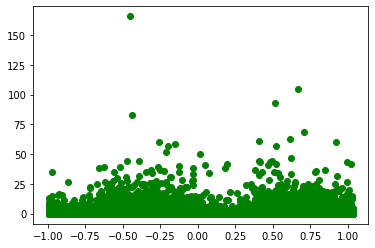

In [ ]:
plt.scatter(val[val['Class']==1].V30, val[val['Class']==1].V29, color='red')
plt.scatter(val[val['Class']==0].V30, val[val['Class']==0].V29, color='green')
plt.show()

# EDA를 통한 아주 간단한 모델

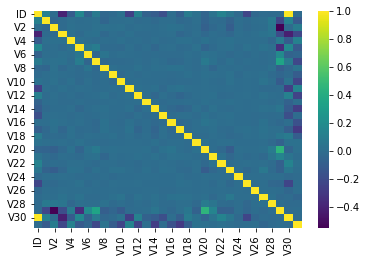

In [ ]:
val_corr = val.corr()
sns.heatmap(val_corr, cmap='viridis')
# V30과 ID correlation 매우 높음

In [ ]:
print(val_corr)

             ID        V1        V2        V3        V4        V5        V6  \
ID     1.000000  0.118766 -0.004260 -0.401006 -0.103958  0.167645 -0.066349   
V1     0.118766  1.000000 -0.038475 -0.014799  0.011677 -0.002571  0.004865   
V2    -0.004260 -0.038475  1.000000 -0.012623  0.016345  0.002036  0.004739   
V3    -0.401006 -0.014799 -0.012623  1.000000  0.014576 -0.012741  0.016019   
V4    -0.103958  0.011677  0.016345  0.014576  1.000000  0.013701  0.001960   
V5     0.167645 -0.002571  0.002036 -0.012741  0.013701  1.000000  0.055214   
V6    -0.066349  0.004865  0.004739  0.016019  0.001960  0.055214  1.000000   
V7     0.084468  0.013540  0.018912  0.028041 -0.009758  0.091640 -0.045892   
V8    -0.032119 -0.044240  0.024011 -0.028748  0.000173 -0.014929  0.046400   
V9    -0.012795  0.003845  0.013742  0.003331 -0.001150 -0.014733 -0.004506   
V10    0.026818  0.005688  0.019898 -0.006199  0.014927 -0.020577  0.006566   
V11   -0.253039  0.011546 -0.000068  0.017994 -0.004

In [ ]:
val_corr['Class'].sort_values()

V17     -0.290434
V14     -0.270852
V12     -0.239264
V10     -0.226813
V7      -0.214810
V3      -0.212345
V16     -0.169542
V5      -0.112254
V1      -0.109284
V9      -0.098666
V18     -0.096104
V6      -0.045676
V27     -0.043127
V28     -0.018156
V30     -0.010476
V24     -0.010131
V15     -0.009532
ID      -0.008435
V25     -0.003573
V29     -0.001762
V21     -0.001090
V13      0.001800
V23      0.005015
V26      0.005371
V20      0.015873
V22      0.016996
V19      0.024223
V8       0.038359
V2       0.096823
V4       0.126146
V11      0.142082
Class    1.000000
Name: Class, dtype: float64

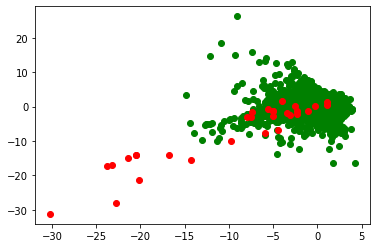

In [ ]:
plt.scatter(val[val['Class']==0].V3, val[val['Class']==0].V7, color='green')
plt.scatter(val[val['Class']==1].V3, val[val['Class']==1].V7, color='red')

plt.show()

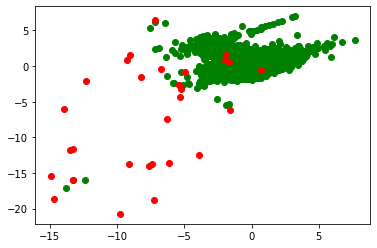

In [ ]:
plt.scatter(val[val['Class']==0].V14, val[val['Class']==0].V17, color='green')
plt.scatter(val[val['Class']==1].V14, val[val['Class']==1].V17, color='red')

plt.show()

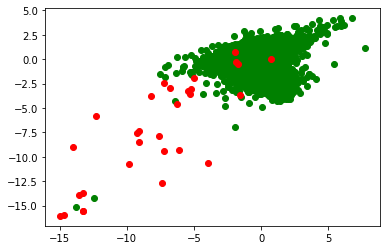

In [ ]:
plt.scatter(val[val['Class']==0].V14, val[val['Class']==0].V12, color='green')
plt.scatter(val[val['Class']==1].V14, val[val['Class']==1].V12, color='red')

plt.show()

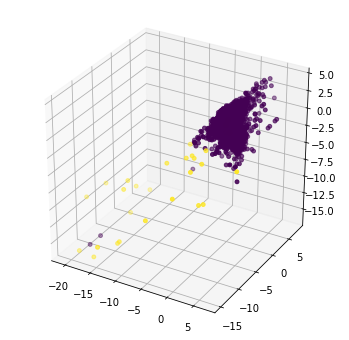

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(val.V17, val.V14, val.V12, c=val.Class, marker='o', s=15)


In [ ]:
import plotly.express as px

fig = px.scatter_3d(val, x='V17', y='V14', z='V12', color='Class', opacity=0.5)
fig.show()

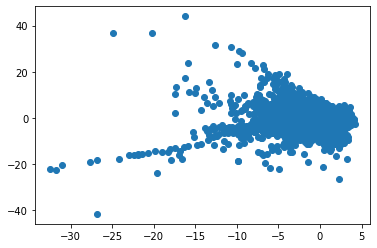

In [ ]:
plt.scatter(train.V3, train.V7)

In [ ]:
val_predict = []
for i in range(val.shape[0]):
  if val.V3[i] < -15 and val.V5[i] < -10:
    val_predict.append(1)
  else:
    val_predict.append(0)

In [ ]:
f1_score(val.Class, val_predict, average='macro')

0.6889870340395065

In [ ]:
test_predict = []
for i in range(test.shape[0]):
  if test.V3[i] < -15 and test.V5[i] < -10:
    test_predict.append(1)
  else:
    test_predict.append(0)

In [ ]:
submission.Class = test_predict

In [ ]:
submission.to_csv('submission_basemodel2.csv', index=False)

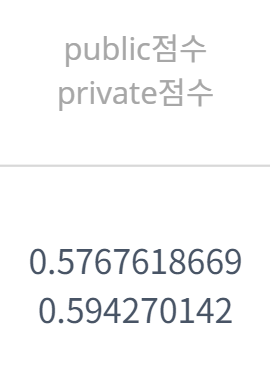

# AGNES

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering().fit(val)

KeyboardInterrupt: ignored

In [ ]:
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1])

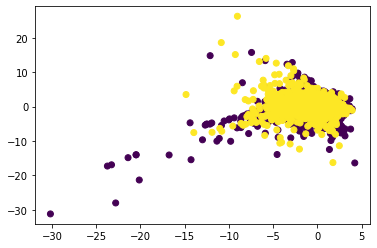

In [ ]:
plt.scatter(val['V3'], val['V7'], c=clustering.labels_)
plt.show()

In [ ]:
f1_score(val.Class, clustering.labels_, average='macro')

0.3518708271999165

In [ ]:
clustering = AgglomerativeClustering().fit(val.loc[:, ['V17', 'V14', 'V12', 'V10', 'V7', 'V3']])

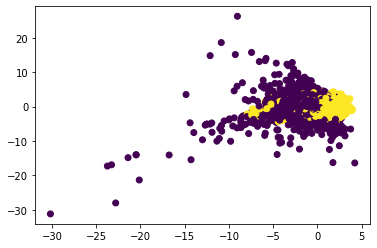

In [ ]:
plt.scatter(val['V3'], val['V7'], c=clustering.labels_)
plt.show()

In [ ]:
f1_score(val.Class, clustering.labels_, average='macro')

0.2708221248687009

cluster model의 성능은 좋지 않았다...

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=2).fit_predict(val)

In [ ]:
np.unique(db)

array([-1])

In [ ]:
for i in range(len(db)):
  if db[i] == -1:
    db[i] = 0

In [ ]:
db

array([0, 0, 0, ..., 0, 0, 0])

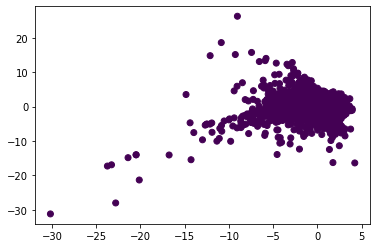

In [ ]:
plt.scatter(val['V3'], val['V7'], c=db)
plt.show()

In [ ]:
f1_score(val.Class, db, average='macro')

0.4997363518121419